# HW 4

In [20]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint

### Problem 1

In [75]:
def dXedx(X_e, x):
    alpha = 1/137
    m_e = .511E+6
    h = .7
    H_0 = (4.558e32 / h)**-1
    e_0 = 13.6
    Omega_m = .3
    eta_b = 6e-10
    T_0 = 2.349e-4

    n_b = eta_b * (2.404/(np.pi)**2) * (e_0/x)**3
    sigmav = 9.78 * (alpha/m_e)**2 * x * np.log(x)
    H_x1 = H_0 * np.sqrt(Omega_m * (e_0/T_0)**3)

    return (sigmav/(H_x1)) * ((1-X_e)*(((m_e*e_0)/(2*np.pi*x))**(3/2))*np.exp(-1*x) - (X_e**2)*n_b)


In [76]:
xs = np.linspace(1, 1000, 10001)
odeint(dXedx, 1, xs)[-1][0]

0.000182166659416114

In [82]:
def dXedx_adjusted(X_e, x):
    alpha = 1/137
    m_e = .511E+6
    h = .7
    H_0 = (4.558e32 / h)**-1
    e_0 = 13.6
    Omega_m = .3
    eta_b = 6e-10
    T_0 = 2.349e-4
    h_bar = 6.5821220e-16

    n_b = eta_b * (2.404/(np.pi)**2) * (e_0/x)**3
    sigmav = 9.78 * (alpha/m_e)**2 * x * np.log(x)
    H_x1 = H_0 * np.sqrt(Omega_m * (e_0/T_0)**3)

    H = H_0 * np.sqrt(Omega_m * (e_0/T_0)**3 * x**-3)
    n_H = (2.404/np.pi**2) * eta_b * (e_0/x)**3 * (1-X_e)
    beta_2 = (9.78 * (alpha/m_e)**2)*(x**(1/2))*np.log(x)*(((m_e*e_0/(2*np.pi*x))**(3/2)))*np.exp(-1*x/4)
    lambda_alpha = h_bar * (H*(3*e_0)**3)/(((n_H)*((8*np.pi)**2))+1e-10)
    lambda_2gamma = h_bar * 8.227
    C = (lambda_alpha + lambda_2gamma)/(lambda_alpha+lambda_2gamma+beta_2)

    return C * (sigmav/(H_x1)) * ((1-X_e)*(((m_e*e_0)/(2*np.pi*x))**(3/2))*np.exp(-1*x) - (X_e**2)*n_b)

In [83]:
xs = np.linspace(1, 1000, 10001)
odeint(dXedx_adjusted, 1, xs)[-1][0]

0.00023120811115400516

### Problem 3

In [2]:
def c_s(a):
    return np.sqrt(1/(3*(1 + .75*911*a)))

def eta(a):
    h = .7
    H_0 = 100*h
    Omega_m = .3
    a_eq = 4.15e-5 / (Omega_m * h**2)
    eta_weird_units = (2 / (H_0*np.sqrt(Omega_m))) * (np.sqrt(a + a_eq) - np.sqrt(a_eq))
    eta = eta_weird_units * 3.1e19 * (3.14159e7)**-1
    return eta

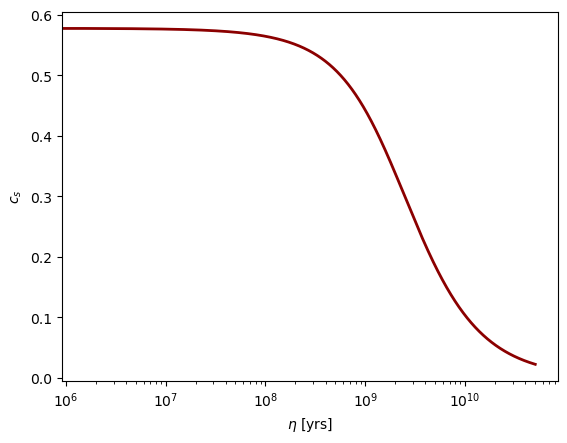

In [3]:
a_arr = np.linspace(0, 1, 1000000)

c_s_arr = c_s(a_arr)
eta_arr = eta(a_arr)

plt.xscale("log")
plt.xlabel("$\eta$ [yrs]")
plt.ylabel("$c_s$")
plt.plot(eta_arr, c_s_arr, color='darkred', linewidth=2)

### Problem 4

In [4]:
from scipy.integrate import quad

In [11]:
def get_a(eta):
    h = .7
    H_0 = 100*h
    Omega_m = .3
    a_eq = 4.15e-5 / (Omega_m * h**2)
    eta = eta / (3.1e19 * (3.14159e7)**-1)

    a = (H_0*np.sqrt(Omega_m)*eta/2 + np.sqrt(a_eq))**2 - a_eq

    return a

def f(eta):
    a = get_a(eta)
    return c_s(a) * 3.06392e-7 # speed of light in mpc/yr

eta_star = 9.13e8
r_s = quad(f, 0, eta_star)[0]
r_s

144.08639363442884

### Problem 5

In [19]:
def X(z, Omega_m=.3, Omega_lambda=.7, h=.7):
    H_0 = 100*h # [km/s/kpc]
    def f(z):
        return H_0**(-1)*(Omega_m*(1+z)**3 + Omega_lambda)**(-1/2) * 3*10**5 # returns in Mpc
    return quad(f, 0, z,)[0]

theta = r_s / X(1)
theta * 206265/3600

2.497053944215946